# Logistic regression - Notebook Sample



## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# this line plots graphs in line
%matplotlib inline


## Importing the raw dataset

In [4]:
# Data set is containted in the same path, in the archive folder
dataset = pd.read_csv("archive/creditcard.csv")

In [7]:
#dataset.info()

In [8]:
#dataset.head(20)

## Undersampling
This is done due to the large bias in the data

In [9]:
def rands(row):
    if( row ==0):
        return  np.random.uniform(low=0, high=0.999)
    else:
        return 0
    

In [18]:
np.random.seed(0)
dataset['rand'] =dataset.Class.apply(rands)
dataUnder = dataset.drop(dataset[(dataset.rand > 0.00167) ].index)


In [19]:
dataUnder=dataUnder.drop(['rand'], axis=1)

1    492
0    468
Name: Class, dtype: int64
as a percentage of the whole dataset
1    51.25
0    48.75
Name: Class, dtype: float64


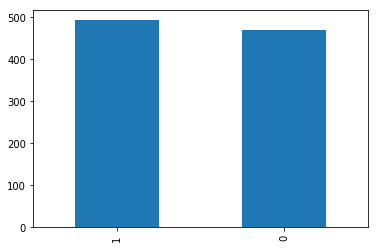

In [20]:
fig, ax = plt.subplots()
print(dataUnder.Class.value_counts())
print("as a percentage of the whole dataset")
print((dataUnder.Class.value_counts()*100)/ len(dataUnder))
dataUnder.Class.value_counts().plot(ax=ax, kind='bar')

In [21]:
#shuffeling the order of the data
dataUnderShuffled = dataUnder.sample(frac =1, random_state=1)

In [22]:
#dataUnderShuffled.head()

## Feature selection

The time feature was removed since it was a feature relating the structre of the experiment. This feature represents the time elapsed since the start of the experiment, and has no relation to credit card fraud.

In [25]:
dataUnderShuffled=dataUnderShuffled.drop(['Time'], axis=1)

#### Use of Corelation Matrix

## Dimention Reduction
Here we explore dimention reduction through the use of PCA

## Logistic Regression
Below are the functions created to be used by the Logistic Regression Model

Sigmoid - returns a probability of the instance being in class 1

In [26]:
def sig_toGetProb(power):
    return 1/(1+ np.exp(-power))


This is the partial derivative of the cross Entropy cost funtion wrt to wrt weights

In [40]:


def ent_partial(X, Y,W, M):
    
    z = np.dot(W, X.T)

    yPred= sig_toGetProb(z)
  
    dotSum = np.dot((Y - yPred), X)
    minus1OnM = (-1 / M)
    
    
    return minus1OnM*dotSum


Gradient Decent - Used to minimise cost

In [41]:
def grad_decMACHINE(a, dataX, Y, W, iterations, M ):
    # a -> the learning rate
    # data -> containing a Class filed which is our Y. 
    # W starting wieghts
    # interations -> how many iterations of gradient decent will be used.

    # Performing Gradient Descent 
    for i in range(iterations):      
        W = W - (a*ent_partial(dataX, Y, W , M))

    return W

# Running 

In [42]:
data = dataUnderShuffled.to_numpy()
Split = 0.6
SplitPosition = int(len(data)*Split)

In [43]:
d_train= np.array(data[0:SplitPosition,:])
d_test = np.array(data[SplitPosition:,:])
print ('Shape of train = ',np.shape(d_train))
print ('Shape of test = ',np.shape(d_test))


Shape of train =  (576, 30)
Shape of test =  (384, 30)


In [44]:

(unique, counts) = np.unique(d_test[:, -1], return_counts=True)

frequencies = np.asarray((unique, counts)).T


print(frequencies)

[[  0. 184.]
 [  1. 200.]]


In [45]:
currentData = d_train
iterations = 100000
M = len(currentData)
np.random.seed(0)
W = np.random.rand(np.shape(currentData)[1] -1)/100
print(W)
Y = currentData[:, -1]
X = currentData[:,:-1]
#print(np.shape(X))
#print(np.shape(W))


Weights = grad_decMACHINE(0.001, X, Y, W, iterations, M )

[0.00548814 0.00715189 0.00602763 0.00544883 0.00423655 0.00645894
 0.00437587 0.00891773 0.00963663 0.00383442 0.00791725 0.00528895
 0.00568045 0.00925597 0.00071036 0.00087129 0.00020218 0.0083262
 0.00778157 0.00870012 0.00978618 0.00799159 0.00461479 0.00780529
 0.00118274 0.00639921 0.00143353 0.00944669 0.00521848]


In [46]:
print(Weights)

[-0.82875934 -1.34213719 -0.75571448  0.90373599 -1.38870598  0.97617502
  1.29423087 -1.54559657 -0.06276777 -0.75286723  0.2421986  -0.34088785
  0.05813063 -0.45592695  0.06883891  0.23184249 -0.12931228 -0.23542884
  0.02862287 -0.34285704  0.88353915 -0.3292526  -1.64235158 -0.08904863
 -0.58957875  0.08136974  0.83116672 -0.06586488 -0.02600613]


In [47]:
def prdictor(W,X):
    z = np.dot(W, X.T)
    
    yPred= sig_toGetProb(z)

    prediction = np.zeros(len(z))
    for i in range(len(z)):
        prediction[i] = (0 if sig_toGetProb(z[i])<0.5 else 1)
    
    return prediction
          


In [48]:
preditcted = prdictor(Weights,d_test[:,:-1])
print(preditcted)

printing predicted zs before sig
[ 8.53201401e+00 -1.75702109e+00  1.54146237e+01 -4.48819545e+00
 -1.14712748e+00 -1.51875033e+00 -1.47446001e+01  1.20653271e+01
  5.23825504e+00  1.44464902e+01  1.24195611e+01  1.54784150e+01
 -4.06347841e+00  1.06967176e+01 -1.56124775e+00  3.22565935e+01
 -1.09044393e+00  3.16003927e+00 -4.50211259e+00  9.14206332e+00
  5.93080759e+00  1.87238198e+00 -1.76753005e+00 -1.95635668e+00
 -1.35430348e+00 -1.61505605e+01  5.38401959e+00 -2.80025786e+00
 -4.81161231e-01 -2.53902721e+00  4.20645436e+01 -1.79716903e+00
 -2.94119879e+00  1.22641819e+01  5.79877769e+00  5.90187998e+00
  3.04140045e+00 -8.05024118e+00 -9.70879755e+00  5.33082828e+00
  2.17804746e+01 -1.10864701e+00 -2.00168392e+00  1.64956119e+01
  1.38375140e+01 -9.42308412e+00 -2.89957516e+00  7.14721493e+00
 -1.38023395e+00  9.16605867e+00  1.92080539e+00  2.89803248e+00
 -1.74618942e+00 -1.92939666e+00 -1.57143670e+00 -2.63691263e+00
 -1.94708068e+00 -1.93866004e+00 -6.65711882e-01 -1.10694

In [50]:

(unique, counts) = np.unique(preditcted, return_counts=True)

frequencies = np.asarray((unique, counts)).T


print(frequencies)

[[  0. 202.]
 [  1. 182.]]


In [51]:
def acc(pred,act):
    countCorrect = 0
    for i in range(len(pred)):
        if(int(pred[i]) ==int(act[i])):
            countCorrect +=1
    return countCorrect/ len(pred)
        

In [52]:
accuraacy = acc(preditcted,d_test[:, -1])

In [53]:
print(accuraacy)

0.890625


In [60]:
corMat =dataset.corr()


In [61]:
corMat[:2]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,rand
Time,1.000000,0.117396,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,0.000488
V1,0.117396,1.000000,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347,0.003732


In [62]:
d_test.shape

(1340, 31)

In [63]:
currentData = d_train
iterations = 1000000
M = len(currentData)
W = np.random.rand(np.shape(currentData)[1] -1)
print(W)
Y = currentData[:, -1]
X = currentData[:,:-1]
print(X.shape)
print(d_test[:,:-1].shape)

[0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263
 0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481
 0.20887676 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
(2010, 30)
(1340, 30)


In [68]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( solver= 'liblinear').fit(X, Y)
pred =clf.predict(d_test[:,:-1])





In [69]:
W=clf.coef_
print(W)

[[-2.74493599e-05 -3.99060847e-02  3.83558724e-02 -1.15966290e-01
   8.16021135e-02 -1.06607705e-02 -3.03991427e-02 -5.77914969e-02
  -4.59321761e-03 -4.18958694e-02 -8.47908562e-02  5.83304879e-02
  -9.67525306e-02 -7.80300352e-03 -1.39565165e-01 -7.92279280e-03
  -6.09254610e-02 -8.98214613e-02 -2.11314597e-02  8.70004876e-03
   5.30995656e-03  1.30071424e-02  4.05705948e-03 -1.90244084e-03
  -3.00751689e-03 -2.76662448e-03  1.46563898e-03  4.54509657e-03
   2.33825830e-03 -1.98064313e-04]]


In [70]:
accuraacy = acc(pred,d_test[:, -1])

In [71]:
print(accuraacy)

0.9477611940298507
